<a href="https://colab.research.google.com/github/vvviet2908/EDA/blob/main/Credit_Card_Fraud_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Name: Vo Van Viet - ID: ITDSIU18043**

**Task 1**: You are required do a proper analysis of the whole data, plot all relevant plots, make note to all observations

**Task 2**: Let sample 100 transactions (denoted by S) from whole data (denoted by D), for every transaction in S, print 10 transactions from D which have least values of `similarity`

The similarity between any two vectors is defined as
$\text{similarity}(v_i,v_j) = \text{cos}^{-1} [ \frac{(v_i \cdot v_j)}{length(v_i) \times length(v_j)} ]$

1. $v_i$ represents a vector i.e. a row in your data.
2. $\text{similarity}(i,j)$ is just a function you can think it like $f(x,y)$
3. $\text{length}(v_i)$: length of the vector $v_i$
4. $i \cdot j$ is the dot product between the vectors $v_i$, $v_j$ 

**Task 3**: Apply 5 different ML algorithms to build classification models.





## Task 1 : Performing EDA(Exploratory Data Analysis on credit card data)

### About the data:

Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. 

**Feature 'Time'** contains the seconds elapsed between each transaction and the first transaction in the dataset. 

The **Feature 'Amount'** is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. 

**Feature 'Class'** is the response variable and it takes value 1 in case of fraud and 0 otherwise.



EDA is performed only on Time and Amount Feature.

#### Find and load the dataset from github

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/nsethi31/Kaggle-Data-Credit-Card-Fraud-Detection/master/creditcard.csv")

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### Print out dataframe information, shape, and count the values of `Class` to check if the data is imbalanced

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
#finding the shape of dataframe (finding no.of observations and features in the given dataframe)
data.shape

(284807, 31)

In [6]:
#finding whether it is balanced data or imbalanced data
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

From the above info it is clear that it is an imbalanced dataset

#### Let rename the class variables 

0 - legitimate

1- fraud

In [7]:
data['Class'] = data['Class'].apply(lambda x:"fraud" if x==1 else "legitimate" )

In [8]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,legitimate
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,legitimate
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,legitimate
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,legitimate
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,legitimate


#### Subsetting the dataset, including only `Time`,`Amount`,`Class`

In [9]:
#subsetting the dataset 
subdata = data[['Time','Amount','Class']]

#### Check the distribution of data (to check whether our subset of data contains same count as original dataset)

In [10]:
#checking the distribution of data (to check whether our subset of data contains same count as original dataset)
subdata['Class'].value_counts()

legitimate    284315
fraud            492
Name: Class, dtype: int64

#### Performing EDA on this data (Pair plots using `seaborns` to find out which features have more importance when compared to other features)


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, "Histogram with PDF for feature 'time'")

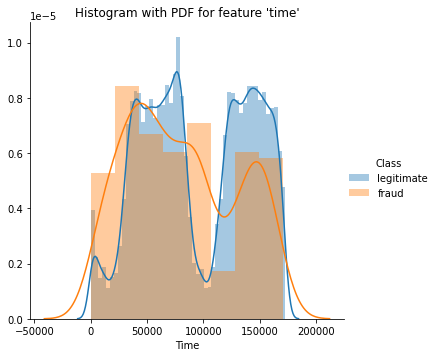

In [11]:
sns.FacetGrid(subdata, hue ='Class', size =5).map(sns.distplot, 'Time').add_legend()
plt.title("Histogram with PDF for feature 'time'")

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, "Histogram with PDF for feature 'amount'")

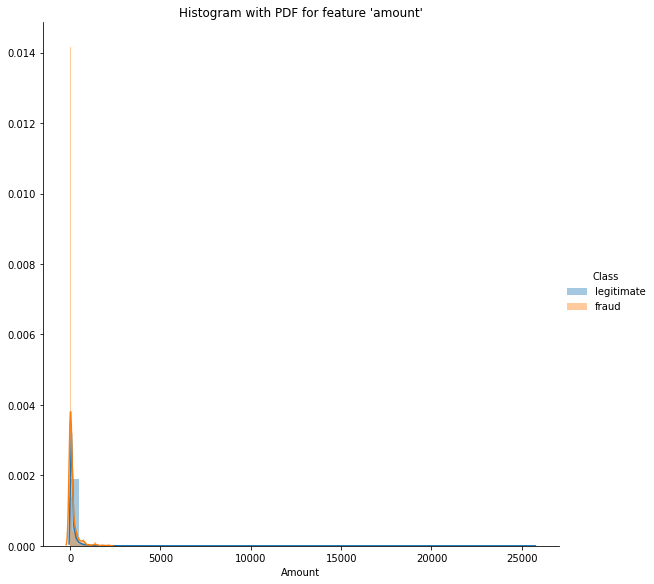

In [12]:
sns.FacetGrid(subdata, hue ='Class', size =8).map(sns.distplot, 'Amount').add_legend()
plt.title("Histogram with PDF for feature 'amount'")

**Observation:**

1.It is evident that the feature 'time' has so much of overlapping. We couldn't make any predictions or classifications out of it. So, we could discard this feature in classification of outcome.

2.Whereas the feature 'Amount' has also overlapping but we could make some prediction out of it when compared to another feature. 
    

    

#### Let divide the data according to classes for appropriate analysis

In [13]:
#dividing the data according to classes for appropriate analysis
subdata_fraud=subdata[subdata['Class']=='fraud']

In [14]:
subdata_fraud.shape

(492, 3)

In [15]:
subdata_fraud.head()

,Time,Amount,Class
541,406.0,0.00,fraud
623,472.0,529.00,fraud
4920,4462.0,239.93,fraud
6108,6986.0,59.00,fraud
6329,7519.0,1.00,fraud


In [16]:
subdata_legitimate=subdata[subdata['Class']=='legitimate']

In [17]:
subdata_legitimate.shape

(284315, 3)

In [18]:
subdata_legitimate.head()

,Time,Amount,Class
0,0.0,149.62,legitimate
1,0.0,2.69,legitimate
2,1.0,378.66,legitimate
3,1.0,123.50,legitimate
4,2.0,69.99,legitimate


### Univariate Analysis on feature 'Amount'

### Plotting **CDF(Cumulative Distributive Function)** and **PDF(Probability Density Function)** to analyze more about the data

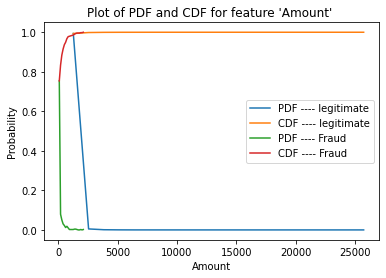

In [19]:
count,bin_edges = np.histogram(subdata_legitimate['Amount'],bins = 20,density = True)
PDF = count/sum(count)
#print("PDF : ",PDF)
#print("\nbin edges : " , bin_edges)
#computing CDF with help of PDF 
CDF = np.cumsum(PDF)
#plotting PDF,CDF
plt.plot(bin_edges[1:],PDF,label = "PDF ---- legitimate")
plt.plot(bin_edges[1:],CDF,label = "CDF ---- legitimate")

count,bin_edges = np.histogram(subdata_fraud['Amount'],bins = 20,density = True)
PDF = count/sum(count)
#computing CDF with help of PDF 
CDF = np.cumsum(PDF)
#plotting PDF,CDF
plt.plot(bin_edges[1:],PDF,label = "PDF ---- Fraud")
plt.plot(bin_edges[1:],CDF,label = "CDF ---- Fraud")

plt.xlabel("Amount")
plt.ylabel("Probability")
plt.title("Plot of PDF and CDF for feature 'Amount' ")
plt.legend()



**Observation and Conclusion **

1.From the above plot we can observe that there is slight overlap between CDF's of both classes

2.But , we can make an observation that more than **95% of fraud transactions** have **purchase Amount below 2500** approximately.

3.From that we can conclude that if the amount of purchase is below 2500 it is more likely to be a fraud transaction else can be classified as a legitimate 

### Box plot and whiskers

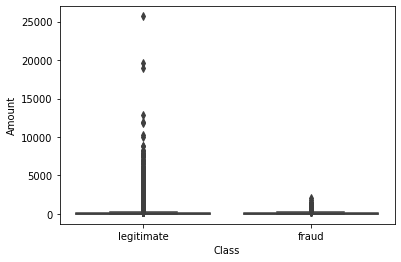

In [20]:
sns.boxplot(data=subdata, x='Class', y='Amount')

### Violin plot

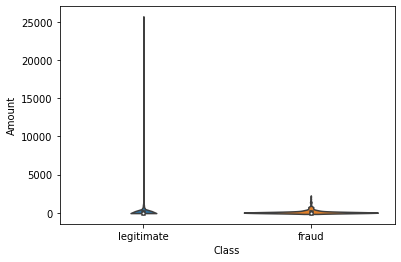

In [21]:
sns.violinplot(data=subdata, x='Class', y='Amount')

**Observation:**
    
These both plots(Box plots as well as Violin plots) are difficult to analyze when compared to PDF and CDF as the data is imbalanced,huge dataset and also scale is not so clear.

## Task 2 : Finding the least values of similarities 
Task 2: Sample (S) 100 transactions from whole data (D), for every transaction in S, print 10 transactions from D which have least values of 'similarity'



In [22]:
#creating a sample of 100 values from Data , 
#sample will not have 'Class' feature in it because for comparison we don't need 'Class' feature.
data_sample = data[data.columns[:-1]].sample(100)

In [23]:
#indexes of all the samples (100 samples)
data_sample.index

Int64Index([ 82925, 271616, 278250,   9933,   2992, 207092, 127541, 277738,
            149275, 242913, 267316, 249147, 256801,  20072, 200853,  72291,
            159062,  65408, 215582, 209770, 165521, 111696, 273643, 150531,
            235503,  95538, 283054, 251629, 216325, 134667,  26969,  63226,
            108140,  53883, 267017,   5903, 140138, 122977,  18326,  83861,
            191322,  71748, 118211,   5467, 234588, 284028, 195105, 131050,
               272, 129530, 170162, 160538, 104370,  42848,  71680,  33970,
            243213,  80379, 256810,  18502, 238032, 123630, 180552, 147851,
             23449, 185366, 168646, 194126, 217226, 278181, 269908,  53501,
             80112, 140256,  46358,  37541, 266300, 217989, 158807, 213090,
             20939,  37395,  42609, 149702, 123513,  18874, 132789,  95609,
            123235, 183442, 144669,  76644,  29695, 121507, 167993, 219605,
              8163,  32847, 148819, 109696],
           dtype='int64')

In [24]:
data_sample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
82925,59613.0,0.387916,0.971124,0.480428,0.944623,0.520523,-1.091987,1.202446,-0.525499,-0.477579,0.226071,-0.485289,-0.223044,-0.214061,0.352901,0.705640,-0.625021,-0.238061,-0.122086,0.420563,-0.038326,0.127865,0.643674,-0.036919,0.400878,-0.808783,-0.461166,0.032823,-0.054781,0.94
271616,164659.0,-1.159848,-0.463922,1.973538,-3.067531,-1.440309,0.033759,-1.211990,0.771673,-1.929351,0.479446,-0.031598,-0.615015,0.132406,-0.477186,-0.912909,0.606679,-0.160138,1.144221,-0.604108,-0.231722,-0.058773,0.059482,-0.255064,-0.383271,0.407568,-0.171358,0.185302,0.021179,25.00
278250,168117.0,1.999118,-0.448675,-0.483436,0.375008,-0.499915,-0.092254,-0.685708,0.066310,1.529471,-0.161275,-1.255211,0.170617,-0.214934,-0.148107,0.575593,0.178322,-0.574205,0.346469,-0.141897,-0.209188,0.170247,0.692285,0.134252,0.589789,-0.063897,-0.235362,0.033977,-0.032111,9.99
9933,14726.0,-5.756425,-3.065102,-1.016164,-0.255673,0.639068,-1.551309,0.226944,0.312911,1.068128,-1.868489,-0.609534,-1.560171,3.083898,1.869161,-1.450861,1.051886,0.190533,-0.400656,-1.021824,-0.981447,-0.371435,-0.884542,-2.494664,-0.172601,0.358296,0.779954,-0.247744,-1.426966,255.00
2992,2543.0,1.230490,0.359178,0.441106,0.771126,-0.531132,-1.258978,0.096393,-0.225682,0.008439,-0.284138,0.227068,0.348011,0.179357,-0.269662,1.069186,0.383224,0.112633,-0.406442,-0.321748,-0.087636,-0.265167,-0.769863,0.168197,0.671853,0.172416,0.074017,-0.022859,0.034407,3.27


In [25]:
#removing class for credit_card_data also.
data_without_label = data[data.columns[:-1]]

In [26]:
data_without_label.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


#### Create a function called similarity to check for the similarity and return least 10 transactions:


In [27]:
def similarity(sample, whole_data): 
    """Returns a dataframe of top 10 least values of similarity
    sample -- pass the one of the index of sample and
    whole_data -- entire dataframe , as we have to compare each row in dataframe with sample."""
    index_value = []
    Class = []
    similarity_list = []
    for i in whole_data.index:
        similarity_value = np.arccos(np.dot(data_sample.loc[sample],data_without_label.loc[i])/(np.linalg.norm(data_sample.loc[sample])*np.linalg.norm(data_without_label.loc[i])))
        similarity_list.append(similarity_value)
        Class.append(data['Class'][i])
        index_value.append(i)
    similarity_df = pd.DataFrame({'index_value':index_value,'similarity_value':similarity_list,'Class':Class})
    print(f"sample index value is {sample} ")
    return similarity_df.sort_values('similarity_value').head(10)
    
    
#sort_values -- will sort the dataframe based on the column given in the function of sort_values

#np.dot -- built-in function of numpy, to calculate dot product between two vectors

# .loc[] --- is used to return a row based on the value provided in the arguments (passing the index in that arguments)

#linalg.norm -- calculates the magnitude of the vector
#The length of the vector is referred to as the vector norm or the vector’s magnitude.
#The length of a vector is a nonnegative number that describes the extent of the vector in space, 
#and is sometimes referred to as the vector’s magnitude or the norm.
    

In [53]:
sample_index = int(input("Enter the one of the index value from your credit_card_data_sample : "))

Enter the one of the index value from your credit_card_data_sample : 272


In [54]:
similarity(sample_index,data_without_label)   
#credit_card_data_without_label -- is the whole dataframe without labels
#sample_index is the value (one of the index value) from the samples.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in arccos
  if __name__ == '__main__':


sample index value is 272 


,index_value,similarity_value,Class
662,662,0.019663,0
1426,1426,0.019683,0
1359,1359,0.019904,0
2491,2491,0.020385,0
2120,2120,0.020490,0
4624,4624,0.020492,0
2371,2371,0.020578,0
3103,3103,0.020764,0
3096,3096,0.020890,0
151296,151296,0.021377,0


## Task 3: Apply 5 different ML algorithms to build classification models.

In [35]:
data = pd.read_csv("https://raw.githubusercontent.com/nsethi31/Kaggle-Data-Credit-Card-Fraud-Detection/master/creditcard.csv")

Split the raw data into train and test datasets

In [36]:
from sklearn.model_selection import train_test_split

X = data.iloc[:,:-1]
y = data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [37]:
def SupportVector():
    from sklearn.svm import SVC
    from sklearn.metrics import recall_score, accuracy_score, precision_score
    
    clf = SVC()    
    start = time.time()
    clf.fit(X_train, y_train)
    stop = time.time()
    traintime=stop-start
    predictions = clf.predict(X_test)
    accuracy_score = accuracy_score(y_test, predictions)
    recall_score = recall_score(y_test, predictions)
    precision_score = precision_score(y_test, predictions)

    return accuracy_score, recall_score, precision_score, traintime

In [38]:
def DecisionTree():
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.metrics import recall_score, accuracy_score, precision_score
    
    clf = DecisionTreeClassifier()
    start = time.time()
    clf.fit(X_train, y_train)
    stop = time.time()
    traintime=stop-start
    predictions = clf.predict(X_test)
    accuracy_score = accuracy_score(y_test, predictions)
    recall_score = recall_score(y_test, predictions)
    precision_score = precision_score(y_test, predictions)

    return accuracy_score, recall_score, precision_score, traintime

In [39]:
def KNN():
    from sklearn.neighbors import KNeighborsClassifier 
    from sklearn.metrics import recall_score, accuracy_score, precision_score
    
    clf = KNeighborsClassifier()
    start = time.time()
    clf.fit(X_train, y_train)
    stop = time.time()
    traintime=stop-start
    predictions = clf.predict(X_test)
    accuracy_score = accuracy_score(y_test, predictions)
    recall_score = recall_score(y_test, predictions)
    precision_score = precision_score(y_test, predictions)

    return accuracy_score, recall_score, precision_score, traintime

In [40]:
def RandomForest():
    from sklearn.ensemble import RandomForestClassifier 
    from sklearn.metrics import recall_score, accuracy_score, precision_score
    
    clf = RandomForestClassifier()
    start = time.time()
    clf.fit(X_train, y_train)
    stop = time.time()
    traintime=stop-start
    predictions = clf.predict(X_test)
    accuracy_score = accuracy_score(y_test, predictions)
    recall_score = recall_score(y_test, predictions)
    precision_score = precision_score(y_test, predictions)

    return accuracy_score, recall_score, precision_score, traintime

In [41]:
def XGBoost():
    from xgboost import XGBClassifier
    from sklearn.metrics import recall_score, accuracy_score, precision_score
    
    clf = XGBClassifier()
    start = time.time()
    clf.fit(X_train, y_train)
    stop = time.time()
    traintime=stop-start
    predictions = clf.predict(X_test)
    accuracy_score = accuracy_score(y_test, predictions)
    recall_score = recall_score(y_test, predictions)
    precision_score = precision_score(y_test, predictions)

    return accuracy_score, recall_score, precision_score, traintime

In [50]:
import time
sv=SupportVector()
dt=DecisionTree()
knn=KNN()
rf=RandomForest()
xg=XGBoost()


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
sv=list(pd.Series(['SVM',sv[0],sv[1],sv[2],sv[3]]))
dt=list(pd.Series(['DecisionTree',dt[0],dt[1],dt[2],dt[3]]))
knn=list(pd.Series(['KNN',knn[0],knn[1],knn[2],knn[3]]))
rf=list(pd.Series(['RandomForest',rf[0],rf[1],rf[2],rf[3]]))
xg=list(pd.Series(['XGBoost',xg[0],xg[1],xg[2],xg[3]]))

In [52]:
compare= pd.DataFrame([sv,dt,knn,rf,xg],columns=['Classifier','Accuracy','Recall','Precision','Runtime'])
compare

,Classifier,Accuracy,Recall,Precision,Runtime
0,SVM,0.998315,0.000000,0.000000,15.093577
1,DecisionTree,0.999185,0.791667,0.742188,21.536638
2,KNN,0.998371,0.041667,0.833333,1.785139
3,RandomForest,0.999551,0.783333,0.940000,253.803825
4,XGBoost,0.999508,0.775000,0.920792,54.206131
